# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing the dataset

In [51]:
filepath = 'C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/Grid_join_all_v4.csv'
dataset = pd.read_csv(filepath)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    float64
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   _mean          937 non-null    float64
 6   Chlorideme     937 non-null    float64
 7   Fluorideme     937 non-null    float64
 8   Hardnessme     937 non-null    float64
 9   SARmean        937 non-null    float64
 10  Sulfatemea     937 non-null    float64
 11  TDSmean        937 non-null    float64
 12  WellDepthm     937 non-null    float64
 13  Joined lay     937 non-null    float64
 14  LR_prob_Y      157 non-null    float64
 15  NBC_prob_Y     157 non-null    float64
 16  LR_pred_Y      157 non-null    float64
 17  label_NBCpred  157 non-null    float64
dtypes: float

In [77]:
dataset.dropna(how='all', axis=0, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    float64
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   _mean          937 non-null    float64
 6   Chlorideme     937 non-null    float64
 7   Fluorideme     937 non-null    float64
 8   Hardnessme     937 non-null    float64
 9   SARmean        937 non-null    float64
 10  Sulfatemea     937 non-null    float64
 11  TDSmean        937 non-null    float64
 12  WellDepthm     937 non-null    float64
 13  Joined lay     937 non-null    float64
 14  LR_prob_Y      157 non-null    float64
 15  NBC_prob_Y     157 non-null    float64
 16  LR_pred_Y      157 non-null    float64
 17  label_NBCpred  157 non-null    float64
dtypes: float64

In [78]:
df = dataset[['id','left','top','right','bottom','label_NBCpred']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    float64
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   label_NBCpred  157 non-null    float64
dtypes: float64(6)
memory usage: 51.2 KB


In [79]:
df.head(5)

,id,left,top,right,bottom,label_NBCpred
0,1.0,-18545.2946,1196517.033,-13717.262600,1191689.001,NaN
1,2.0,-18545.2946,1191689.001,-13717.262600,1186860.969,NaN
2,3.0,-13717.2626,1201345.065,-8889.230595,1196517.033,NaN
3,4.0,-13717.2626,1196517.033,-8889.230595,1191689.001,NaN
4,5.0,-13717.2626,1191689.001,-8889.230595,1186860.969,1.0


In [80]:
df_train = df.dropna(axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 4 to 883
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             157 non-null    float64
 1   left           157 non-null    float64
 2   top            157 non-null    float64
 3   right          157 non-null    float64
 4   bottom         157 non-null    float64
 5   label_NBCpred  157 non-null    float64
dtypes: float64(6)
memory usage: 8.6 KB


In [81]:
df_train.head(5)

,id,left,top,right,bottom,label_NBCpred
4,5.0,-13717.2626,1191689.001,-8889.230595,1186860.969,1.0
117,118.0,-119933.9666,1027535.913,-115105.934600,1022707.881,0.0
134,135.0,-115105.9346,1099956.393,-110277.902600,1095128.361,0.0
135,136.0,-115105.9346,1095128.361,-110277.902600,1090300.329,0.0
138,139.0,-115105.9346,1080644.265,-110277.902600,1075816.233,0.0


<AxesSubplot:>

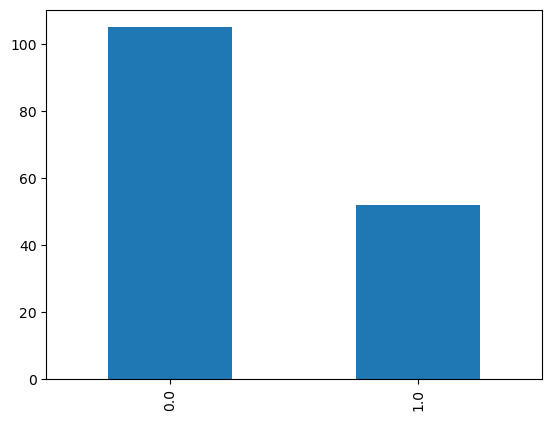

In [82]:
df_train['label_NBCpred'].value_counts().plot(kind = 'bar')

In [83]:
X = df_train[df_train.columns[1:5]].copy()
y = df_train['label_NBCpred'].copy()

In [84]:
X

,left,top,right,bottom
4,-13717.262600,1191689.001,-8889.230595,1186860.969
117,-119933.966600,1027535.913,-115105.934600,1022707.881
134,-115105.934600,1099956.393,-110277.902600,1095128.361
135,-115105.934600,1095128.361,-110277.902600,1090300.329
138,-115105.934600,1080644.265,-110277.902600,1075816.233
...,...,...,...,...
855,-8889.230595,1167548.841,-4061.198595,1162720.809
857,-8889.230595,1157892.777,-4061.198595,1153064.745
866,-4061.198595,1167548.841,766.833405,1162720.809
881,5594.865405,1182032.937,10422.897400,1177204.905


# Training the K-NN model on the Training set

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [86]:
pred = knn.predict(X)

C:\Users\mengj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [87]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve
)

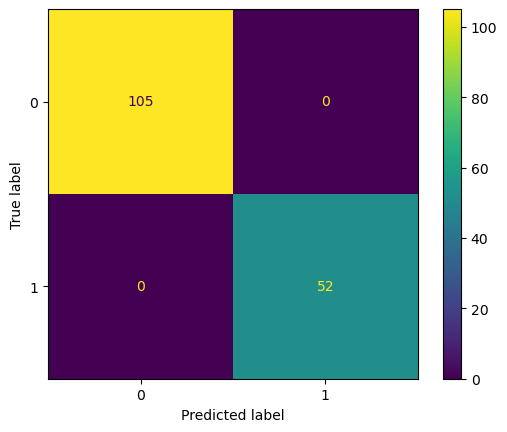

In [88]:
# The confusion matrix
labels = [0,1]
cm = confusion_matrix(y, pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [89]:
# accuracy score
accur = accuracy_score(pred, y)
print(accur)

1.0


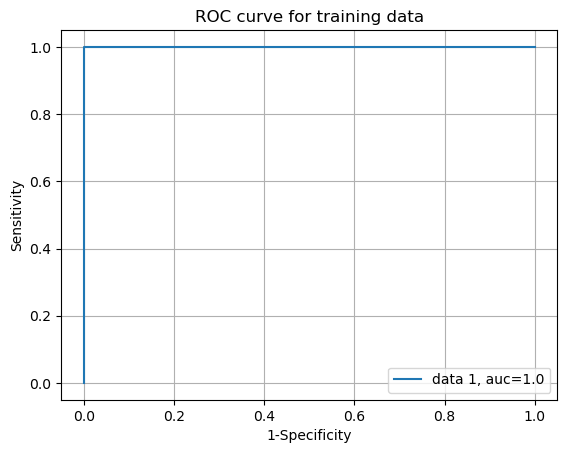

In [90]:
from sklearn import metrics
y_pred_proba = knn.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC curve for training data')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

## predict all location

In [91]:
X_all = df.iloc[:,1:5]
X_all.head(5)

,left,top,right,bottom
0,-18545.2946,1196517.033,-13717.262600,1191689.001
1,-18545.2946,1191689.001,-13717.262600,1186860.969
2,-13717.2626,1201345.065,-8889.230595,1196517.033
3,-13717.2626,1196517.033,-8889.230595,1191689.001
4,-13717.2626,1191689.001,-8889.230595,1186860.969


In [92]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   left    937 non-null    float64
 1   top     937 non-null    float64
 2   right   937 non-null    float64
 3   bottom  937 non-null    float64
dtypes: float64(4)
memory usage: 36.6 KB


In [93]:
df_pred = knn.predict(X_all)

C:\Users\mengj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [94]:
# convert numpy array to pandas dataframe
df_pred = pd.DataFrame(df_pred, columns = ['label_KNNpred'])
df_pred.index = dataset.index
df_concat = dataset.iloc[:,:5]
df_KNNpred = pd.concat([df_concat, df_pred], axis=1)
df_KNNpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    float64
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   label_KNNpred  937 non-null    float64
dtypes: float64(6)
memory usage: 51.2 KB


In [95]:
df_KNNpred.to_csv('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineGrid_KNN_NBC.csv')

## predict for nulls location

In [120]:
df.isnull().sum()

left            0
top             0
right           0
bottom          0
label_NBCp    780
dtype: int64

In [121]:
df_null = df.iloc[680:].copy()
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 564 to 562
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   left        780 non-null    float64
 1   top         780 non-null    float64
 2   right       780 non-null    float64
 3   bottom      780 non-null    float64
 4   label_NBCp  0 non-null      float64
dtypes: float64(5)
memory usage: 36.6 KB


In [122]:
df_null.head(5)

,left,top,right,bottom,label_NBCp
id,,,,,
564,-86137.7426,1051676.073,-81309.7106,1046848.041,NaN
565,-86137.7426,1046848.041,-81309.7106,1042020.009,NaN
566,-86137.7426,1042020.009,-81309.7106,1037191.977,NaN
567,-86137.7426,1037191.977,-81309.7106,1032363.945,NaN
568,-86137.7426,1032363.945,-81309.7106,1027535.913,NaN


In [129]:
X_null = df_null.iloc[:,:4]
df_pred = knn.predict(X_null)

C:\Users\mengj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\mengj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [130]:
# convert numpy array to pandas dataframe
df_pred = pd.DataFrame(df_pred, columns = ['label_NBCp'])
df_pred.index = df_null.index
df_concat = dataset.iloc[:,:5]
df_KNNpred = pd.concat([df_concat, df_pred], axis=1)
df_KNNpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 803 to 562
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1460 non-null   int64  
 1   left        1460 non-null   float64
 2   top         1460 non-null   float64
 3   right       1460 non-null   float64
 4   bottom      1460 non-null   float64
 5   label_NBCp  780 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 79.8 KB


In [134]:
df_KNNpred.dropna(axis=0, inplace=True)
df_KNNpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 564 to 562
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          780 non-null    int64  
 1   left        780 non-null    float64
 2   top         780 non-null    float64
 3   right       780 non-null    float64
 4   bottom      780 non-null    float64
 5   label_NBCp  780 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 42.7 KB


In [139]:
df_NBCpred = dataset[['id','left','top','right','bottom','label_NBCp']]
df_NBCpred.dropna(axis=0, inplace=True)
df_NBCpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 803 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          680 non-null    int64  
 1   left        680 non-null    float64
 2   top         680 non-null    float64
 3   right       680 non-null    float64
 4   bottom      680 non-null    float64
 5   label_NBCp  680 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 37.2 KB


C:\Users\mengj\AppData\Local\Temp\ipykernel_14700\2785855720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBCpred.dropna(axis=0, inplace=True)


In [140]:
df_KNNpred_NBC = pd.concat([df_NBCpred, df_KNNpred], axis=0)
df_KNNpred_NBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 803 to 562
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1460 non-null   int64  
 1   left        1460 non-null   float64
 2   top         1460 non-null   float64
 3   right       1460 non-null   float64
 4   bottom      1460 non-null   float64
 5   label_NBCp  1460 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 79.8 KB


In [142]:
df_KNNpred_NBC.to_csv('C:/Users/mengj/OneDrive - lamar.edu/LectureNote2023/MLforCivilEng/TeamProject2/WoodbineGrid_KNN_NBC2.csv')